Part I: The Perceptron

Task 1: Generate Dataset

In [25]:
import numpy as np

mean1 = [1,2]
cov1 = [[0.5, 0], [0, 0.5]]
mean2 = [7,8]
cov2 = [[0.5, 0], [0, 0.5]]

# dataset 1
data1_train = np.random.multivariate_normal(mean1, cov1, 80)
data1_test = np.random.multivariate_normal(mean1, cov1, 20)

# dataset 2
data2_train = np.random.multivariate_normal(mean2, cov2, 80)
data2_test = np.random.multivariate_normal(mean2, cov2, 20)

# Combining the dataset 1 and dataset 2
X_train = np.vstack([data1_train, data2_train]) # training set: 160 points 
X_test = np.vstack([data1_test, data2_test]) # test set: 40 points

# Creating labels for the dataset
y_train = np.array([-1]*80 + [1]*80)
y_test = np.array([-1]*20 + [1]*20)

# Shuffling the training dataset
shuffle_train = np.random.permutation(160)
X_train_shuffled = X_train[shuffle_train]
y_train_shuffled = y_train[shuffle_train]

print("Training dataset shape:", X_train_shuffled.shape)
print("Test dataset shape:", X_test.shape)


Training dataset shape: (160, 2)
Test dataset shape: (40, 2)


Plot the Dataset

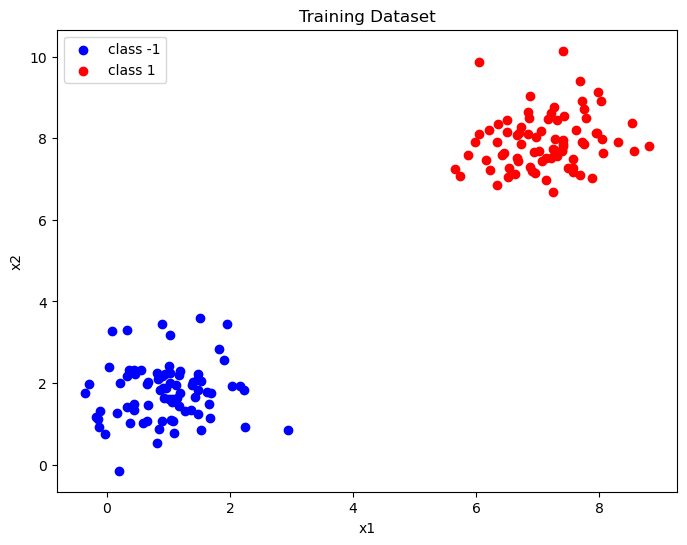

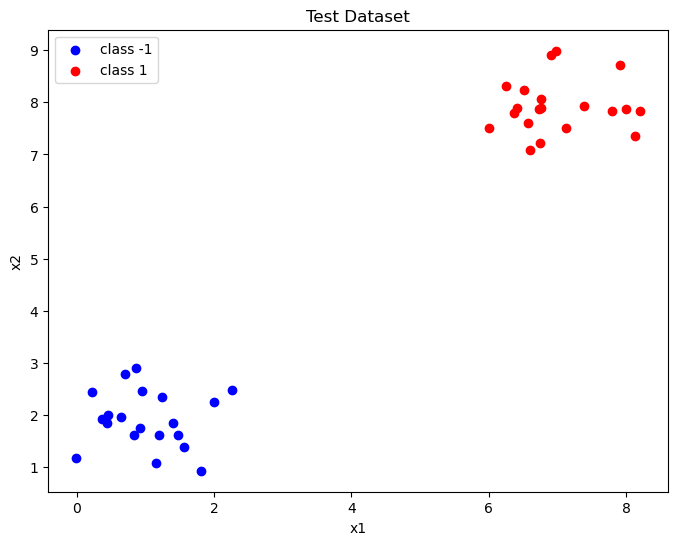

In [26]:
import matplotlib.pyplot as plt

# Plotting the training dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_train_shuffled[y_train_shuffled == -1][:, 0], X_train_shuffled[y_train_shuffled == -1][:, 1], color='blue', label='class -1')
plt.scatter(X_train_shuffled[y_train_shuffled == 1][:, 0], X_train_shuffled[y_train_shuffled == 1][:, 1], color='red', label='class 1')
plt.title('Training Dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Plotting the test dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_test[y_test == -1][:, 0], X_test[y_test == -1][:, 1], color='blue', label='class -1')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='red', label='class 1')
plt.title('Test Dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


Task 2: Implement perceptron.py

In [27]:
from perceptron import Perceptron

learning_rate = 0.01
epochs = 100

n_inputs = X_train_shuffled.shape[1]

print('n_inputs: ' + str(n_inputs))

perceptron_model = Perceptron(n_inputs, max_epochs=epochs, learning_rate=learning_rate)

n_inputs: 2


Task 3: Train the model

In [28]:
perceptron_model.train(X_train_shuffled, y_train_shuffled)

Epoch 0: Training Accuracy: 0.50, Loss: 80
Epoch 1: Training Accuracy: 0.50, Loss: 80
Epoch 2: Training Accuracy: 0.51, Loss: 80
Epoch 3: Training Accuracy: 0.52, Loss: 79
Epoch 4: Training Accuracy: 0.61, Loss: 77
Epoch 5: Training Accuracy: 0.97, Loss: 62
Epoch 6: Training Accuracy: 0.99, Loss: 4
Epoch 7: Training Accuracy: 0.99, Loss: 2
Epoch 8: Training Accuracy: 0.99, Loss: 2
Epoch 9: Training Accuracy: 0.99, Loss: 2
Epoch 10: Training Accuracy: 0.99, Loss: 1
Epoch 11: Training Accuracy: 0.99, Loss: 1
Epoch 12: Training Accuracy: 0.99, Loss: 2
Epoch 13: Training Accuracy: 0.99, Loss: 1
Epoch 14: Training Accuracy: 0.99, Loss: 1
Epoch 15: Training Accuracy: 0.99, Loss: 1
Epoch 16: Training Accuracy: 0.99, Loss: 1
Epoch 17: Training Accuracy: 0.99, Loss: 2
Epoch 18: Training Accuracy: 0.99, Loss: 1
Epoch 19: Training Accuracy: 0.99, Loss: 1
Epoch 20: Training Accuracy: 0.99, Loss: 1
Epoch 21: Training Accuracy: 0.99, Loss: 1
Epoch 22: Training Accuracy: 0.99, Loss: 2
Epoch 23: Train

Task 4: Test the test dataset

In [29]:
y_pred = np.array([perceptron_model.forward(x) for x in X_test])

Task 5: Evaluate the accuracy

Training Accuracy: 1.00
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        80

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

[[80  0]
 [ 0 80]]


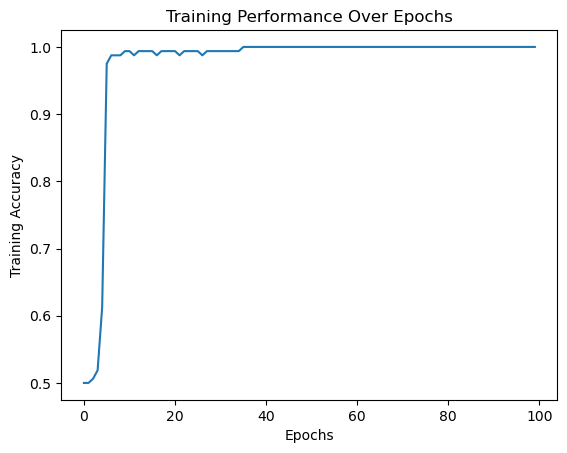

Test set accuracy: 1.00
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

[[20  0]
 [ 0 20]]


In [30]:
# TRAINING SET ACCURACY
y_pred_train = np.array([perceptron_model.forward(x) for x in X_train_shuffled])

accuracy_train = np.mean(y_pred_train == y_train_shuffled)
print(f'Training Accuracy: {accuracy_train:.2f}')

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_train_shuffled, y_pred_train))
print(confusion_matrix(y_train_shuffled, y_pred_train))

# plot training accuracy 
import matplotlib.pyplot as plt

plt.plot(perceptron_model.training_accuracy)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Performance Over Epochs')
plt.show()


# TEST SET ACCURACY
accuracy = np.mean(y_pred == y_test)

print(f'Test set accuracy: {accuracy:.2f}')

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

